<a href="https://colab.research.google.com/github/shahd1995913/Deepfake-Privacy-Preserving-AI-Based-Early-Fall-Detection-for-our-Elders/blob/main/(Facial%20Expression%20Recognition%20and%20pose%20estimation/OpenPose_by_mediapipe_in_images_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install mediapipe opencv-python

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 4.1 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of opencv-python to determine which version is compatible with other requirements. This could take a while.
INFO: pip is looking at multiple versions of opencv-contrib-python to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.6/35.6 MB 46.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.0/63.0 MB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 100.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 25.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.1/69.1 MB 9.7 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 5.29.5
    Uninstalling protobuf-5.29.5:
      Successfully uninstalled protobuf-5.29.5
  Attempting uninstall: numpy
    Found existing ins

Saving images (1).jfif to images (1).jfif
Detected pose state: Standing or upright


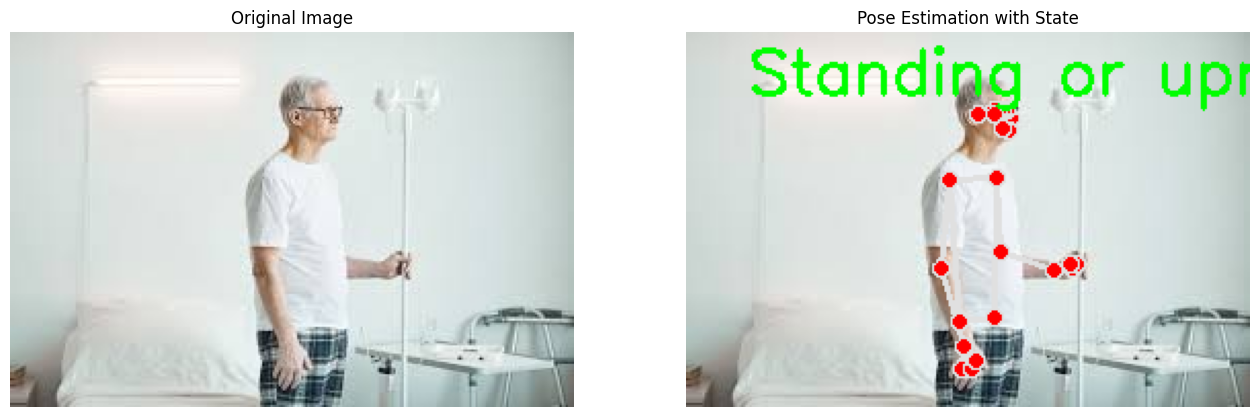

In [2]:
import cv2
import mediapipe as mp
import numpy as np
import math
from google.colab.patches import cv2_imshow
from google.colab import files
import matplotlib.pyplot as plt

# Upload image
uploaded = files.upload()
image_path = list(uploaded.keys())[0]

# Initialize Mediapipe pose
mp_pose = mp.solutions.pose
pose = mp_pose.Pose(static_image_mode=True, min_detection_confidence=0.5)

# Vector angle calculation helper
def vector_angle(v1, v2):
    unit_v1 = v1 / (np.linalg.norm(v1) + 1e-6)
    unit_v2 = v2 / (np.linalg.norm(v2) + 1e-6)
    dot = np.dot(unit_v1, unit_v2)
    angle = math.degrees(np.arccos(np.clip(dot, -1.0, 1.0)))
    return angle

# Pose state classification based on torso angle
def get_pose_state(landmarks):
    left_shoulder = np.array([landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].x,
                              landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].y])
    right_shoulder = np.array([landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].x,
                               landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].y])
    left_hip = np.array([landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].x,
                         landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].y])
    right_hip = np.array([landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value].x,
                          landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value].y])

    mid_shoulder = (left_shoulder + right_shoulder) / 2
    mid_hip = (left_hip + right_hip) / 2

    torso_vec = mid_hip - mid_shoulder
    vertical_vec = np.array([0, 1])

    angle = vector_angle(torso_vec, vertical_vec)

    if angle < 45:
        return "Standing or upright"
    elif angle > 75:
        return "Lying down (sleep/fall)"
    else:
        return "Sitting or intermediate"

# Read and process image
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
results = pose.process(image_rgb)

annotated_image = image.copy()

if results.pose_landmarks:
    mp.solutions.drawing_utils.draw_landmarks(
        annotated_image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS)

    state = get_pose_state(results.pose_landmarks.landmark)
    print("Detected pose state:", state)

    # Put text on image
    cv2.putText(annotated_image, state, (30, 30),
                cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

    # Show original and annotated images side by side
    fig, axs = plt.subplots(1, 2, figsize=(16, 8))

    axs[0].imshow(image_rgb)
    axs[0].set_title('Original Image')
    axs[0].axis('off')

    axs[1].imshow(cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB))
    axs[1].set_title('Pose Estimation with State')
    axs[1].axis('off')

    plt.show()

else:
    print("No pose landmarks detected.")


Saving images (1).jfif to images (1) (2).jfif
Detected pose state: Standing or upright


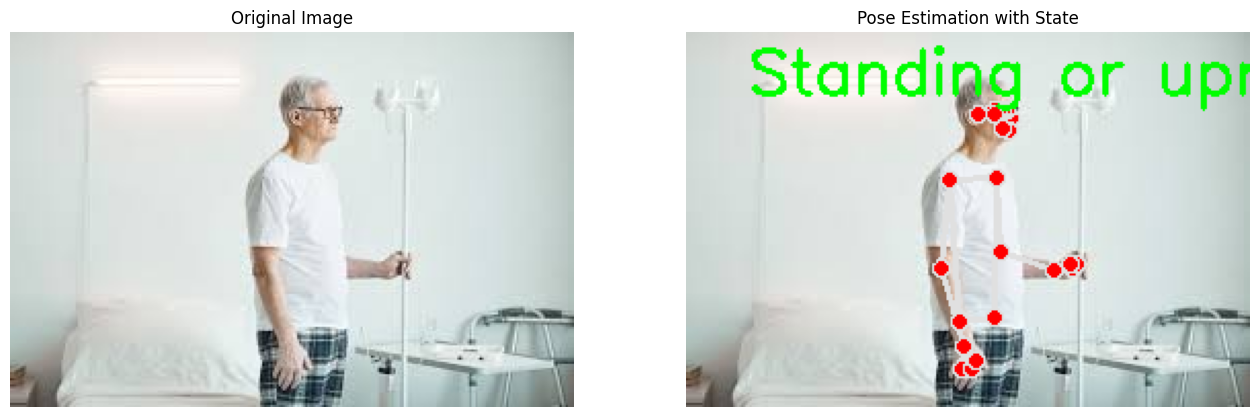

In [7]:
import cv2
import mediapipe as mp
import numpy as np
import math
from google.colab.patches import cv2_imshow
from google.colab import files
import matplotlib.pyplot as plt

# Upload image
uploaded = files.upload()
image_path = list(uploaded.keys())[0]

# Initialize Mediapipe pose
mp_pose = mp.solutions.pose
pose = mp_pose.Pose(static_image_mode=True, min_detection_confidence=0.5)

# Vector angle calculation helper
def vector_angle(v1, v2):
    unit_v1 = v1 / (np.linalg.norm(v1) + 1e-6)
    unit_v2 = v2 / (np.linalg.norm(v2) + 1e-6)
    dot = np.dot(unit_v1, unit_v2)
    angle = math.degrees(np.arccos(np.clip(dot, -1.0, 1.0)))
    return angle

# Pose state classification based on torso angle
def get_pose_state(landmarks):
    left_shoulder = np.array([landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].x,
                              landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].y])
    right_shoulder = np.array([landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].x,
                               landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].y])
    left_hip = np.array([landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].x,
                         landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].y])
    right_hip = np.array([landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value].x,
                          landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value].y])

    mid_shoulder = (left_shoulder + right_shoulder) / 2
    mid_hip = (left_hip + right_hip) / 2

    torso_vec = mid_hip - mid_shoulder
    vertical_vec = np.array([0, 1])

    angle = vector_angle(torso_vec, vertical_vec)

    if angle < 45:
        return "Standing or upright"
    elif angle > 75:
        return "Lying down (sleep/fall)"
    else:
        return "Sitting or intermediate"

# Read and process image
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
results = pose.process(image_rgb)

annotated_image = image.copy()

if results.pose_landmarks:
    mp.solutions.drawing_utils.draw_landmarks(
        annotated_image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS)

    state = get_pose_state(results.pose_landmarks.landmark)
    print("Detected pose state:", state)

    # Put text on image
    cv2.putText(annotated_image, state, (30, 30),
                cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

    # Show original and annotated images side by side
    fig, axs = plt.subplots(1, 2, figsize=(16, 8))

    axs[0].imshow(image_rgb)
    axs[0].set_title('Original Image')
    axs[0].axis('off')

    axs[1].imshow(cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB))
    axs[1].set_title('Pose Estimation with State')
    axs[1].axis('off')

    plt.show()

else:
    print("No pose landmarks detected.")


Saving images (1).jfif to images (1) (3).jfif
Detected pose state: Standing or upright


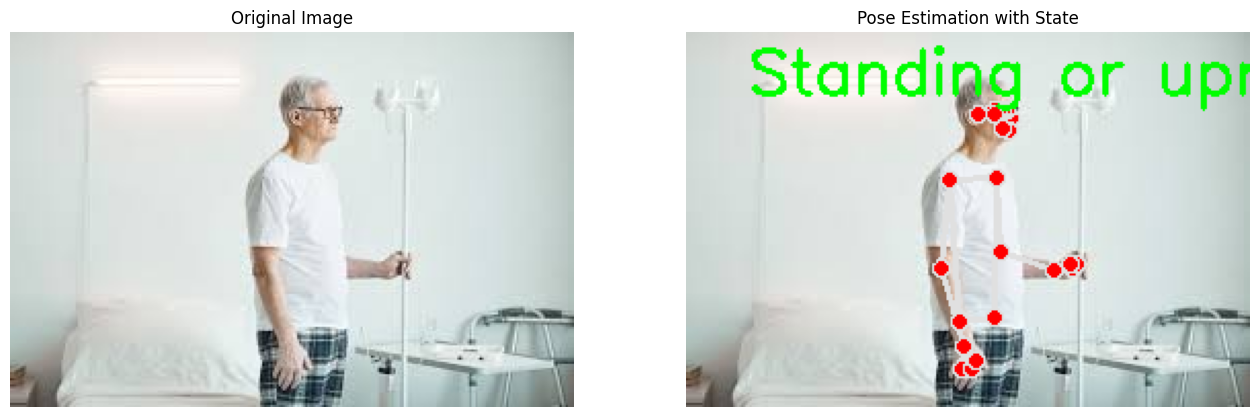

In [14]:
import cv2
import mediapipe as mp
import numpy as np
import math
from google.colab.patches import cv2_imshow
from google.colab import files
import matplotlib.pyplot as plt

# رفع صورة
uploaded = files.upload()
image_path = list(uploaded.keys())[0]

# تهيئة Mediapipe
mp_pose = mp.solutions.pose
pose = mp_pose.Pose(static_image_mode=True, min_detection_confidence=0.5)

# دالة لحساب الزاوية بين متجهين
def vector_angle(v1, v2):
    unit_v1 = v1 / (np.linalg.norm(v1) + 1e-6)
    unit_v2 = v2 / (np.linalg.norm(v2) + 1e-6)
    dot = np.dot(unit_v1, unit_v2)
    angle = math.degrees(np.arccos(np.clip(dot, -1.0, 1.0)))
    return angle

# دالة لحساب زاوية عند نقطة b بين نقطتين a و c
def angle_between_points(a, b, c):
    ba = a - b
    bc = c - b
    cos_angle = np.dot(ba, bc) / (np.linalg.norm(ba) * np.linalg.norm(bc) + 1e-6)
    angle = np.degrees(np.arccos(np.clip(cos_angle, -1.0, 1.0)))
    return angle

# دالة تصنيف وضعية الجسم بناءً على الزوايا
def get_pose_state_with_knee_and_horizontal_check(landmarks):
    left_shoulder = np.array([landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].x,
                              landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].y])
    right_shoulder = np.array([landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].x,
                               landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].y])
    left_hip = np.array([landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].x,
                         landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].y])
    right_hip = np.array([landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value].x,
                          landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value].y])
    nose = np.array([landmarks[mp_pose.PoseLandmark.NOSE.value].x,
                     landmarks[mp_pose.PoseLandmark.NOSE.value].y])

    mid_shoulder = (left_shoulder + right_shoulder) / 2
    mid_hip = (left_hip + right_hip) / 2

    torso_vec = mid_hip - mid_shoulder
    vertical_vec = np.array([0, 1])
    torso_angle = vector_angle(torso_vec, vertical_vec)

    # تحقق إذا كان الفرق الرأسي بين الكتفين والوركين صغير (تقريبًا أفقي)
    vertical_diff = abs(mid_shoulder[1] - mid_hip[1])

    # إضافة شرط افقي
    if vertical_diff < 0.05:
        # الفرق صغير جدا بين ارتفاع الكتف والورك، قد يكون مستلقي
        return "Lying down (sleep/fall)"

    # يمكنك إضافة حساب زاوية الركبة كما في الكود السابق إذا تريد دقة أعلى

    if torso_angle < 45:
        return "Standing or upright"
    elif torso_angle > 75:
        if nose[1] > mid_hip[1]:
            return "Lying down (sleep/fall)"
        else:
            return "Sitting or reclined"
    else:
        return "Sitting or intermediate"


# قراءة الصورة ومعالجتها
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
results = pose.process(image_rgb)

annotated_image = image.copy()

if results.pose_landmarks:
    mp.solutions.drawing_utils.draw_landmarks(
        annotated_image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS)

    state = get_pose_state_with_knee(results.pose_landmarks.landmark)
    print("Detected pose state:", state)

    # عرض الحالة على الصورة
    cv2.putText(annotated_image, state, (30, 30),
                cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

    # عرض الصورة الأصلية والمعلّمة جنبًا إلى جنب
    fig, axs = plt.subplots(1, 2, figsize=(16, 8))

    axs[0].imshow(image_rgb)
    axs[0].set_title('Original Image')
    axs[0].axis('off')

    axs[1].imshow(cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB))
    axs[1].set_title('Pose Estimation with State')
    axs[1].axis('off')

    plt.show()

else:
    print("No pose landmarks detected.")